# **Supervised Classification Algorithms - Hypertension Prediction**

In [242]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
import os


O dataset utilizado neste notebook é o "Hypertension Prediction Dataset", disponível no Kaggle:  [Hypertension Prediction Dataset](https://www.kaggle.com/datasets/miadul/hypertension-risk-prediction-dataset/data)

In [243]:
csv_path = os.path.join( os.getcwd(), "..", ".." , "data", "Hypertension", "hypertension_dataset.csv")
data = pd.read_csv(csv_path, sep =',')

# Display the first few rows of the dataset
data.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


Observando o Dataset vendo os tipos de dados e possíveis valores nulos.

In [244]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


Percebemos que em Medication o total de entries é menor que nas outras colunas, indicando a presença de valores nulos.

In [245]:
data.isnull().sum() # Contagem de valores nulos por coluna

Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

In [246]:
np.round(data.isnull().sum() / data.shape[0] * 100, 2) # Percentual de valores nulos por coluna 

Age                  0.00
Salt_Intake          0.00
Stress_Score         0.00
BP_History           0.00
Sleep_Duration       0.00
BMI                  0.00
Medication          40.25
Family_History       0.00
Exercise_Level       0.00
Smoking_Status       0.00
Has_Hypertension     0.00
dtype: float64

Vemos que em Medication ha 40.25% de valores nulos, vamos investigar e tomar uma decisão sobre o que fazer com esses valores.

In [247]:
for col in data.select_dtypes(include=['object']).columns:
    print(f"Coluna: {col}")
    print(data[col].unique())
    print("-"*20)


Coluna: BP_History
['Normal' 'Hypertension' 'Prehypertension']
--------------------
Coluna: Medication
[nan 'ACE Inhibitor' 'Other' 'Beta Blocker' 'Diuretic']
--------------------
Coluna: Family_History
['Yes' 'No']
--------------------
Coluna: Exercise_Level
['Low' 'Moderate' 'High']
--------------------
Coluna: Smoking_Status
['Non-Smoker' 'Smoker']
--------------------
Coluna: Has_Hypertension
['Yes' 'No']
--------------------


Apenas a coluna Medication possui valores nulos, talvez esses valores nulos sejam referentes a pessoas que não fazem uso de medicação.

In [248]:
data['Medication'] = data['Medication'].fillna('No Medication') # Preenchendo valores nulos com 'No Medication'

Assumimos que os valores nulos em Medication indicam que a pessoa não faz uso de medicação, então preenchemos esses valores nulos com 'No Medication'. Chegamos a essa conclusão ao observar os valores únicos da coluna Medication, onde não há uma categoria que indique "nenhum" ou similar, e faz sentido que pessoas sem medicação não tenham essa informação preenchida.

Conferindo se ainda ha valores nulos:

In [249]:
np.round(data.isnull().sum() / data.shape[0] * 100, 2)

Age                 0.0
Salt_Intake         0.0
Stress_Score        0.0
BP_History          0.0
Sleep_Duration      0.0
BMI                 0.0
Medication          0.0
Family_History      0.0
Exercise_Level      0.0
Smoking_Status      0.0
Has_Hypertension    0.0
dtype: float64

Vamos observar o dataset e entender o balanço entre as classes.

In [250]:
data['Has_Hypertension'].value_counts()


Has_Hypertension
Yes    1032
No      953
Name: count, dtype: int64

In [251]:
print(
    f"Proporção de pessoas com hipertensão: {data['Has_Hypertension'].value_counts(normalize=True)[0]:.2%} e Proporção de pessoas sem hipertensão {data['Has_Hypertension'].value_counts(normalize=True)[1]:.2%}")

Proporção de pessoas com hipertensão: 51.99% e Proporção de pessoas sem hipertensão 48.01%


Podemos perceber que a diferença entre as duas classe é muito pequena, o que nos leva a crer que o dataset é balanceado.

Analise exploratória:

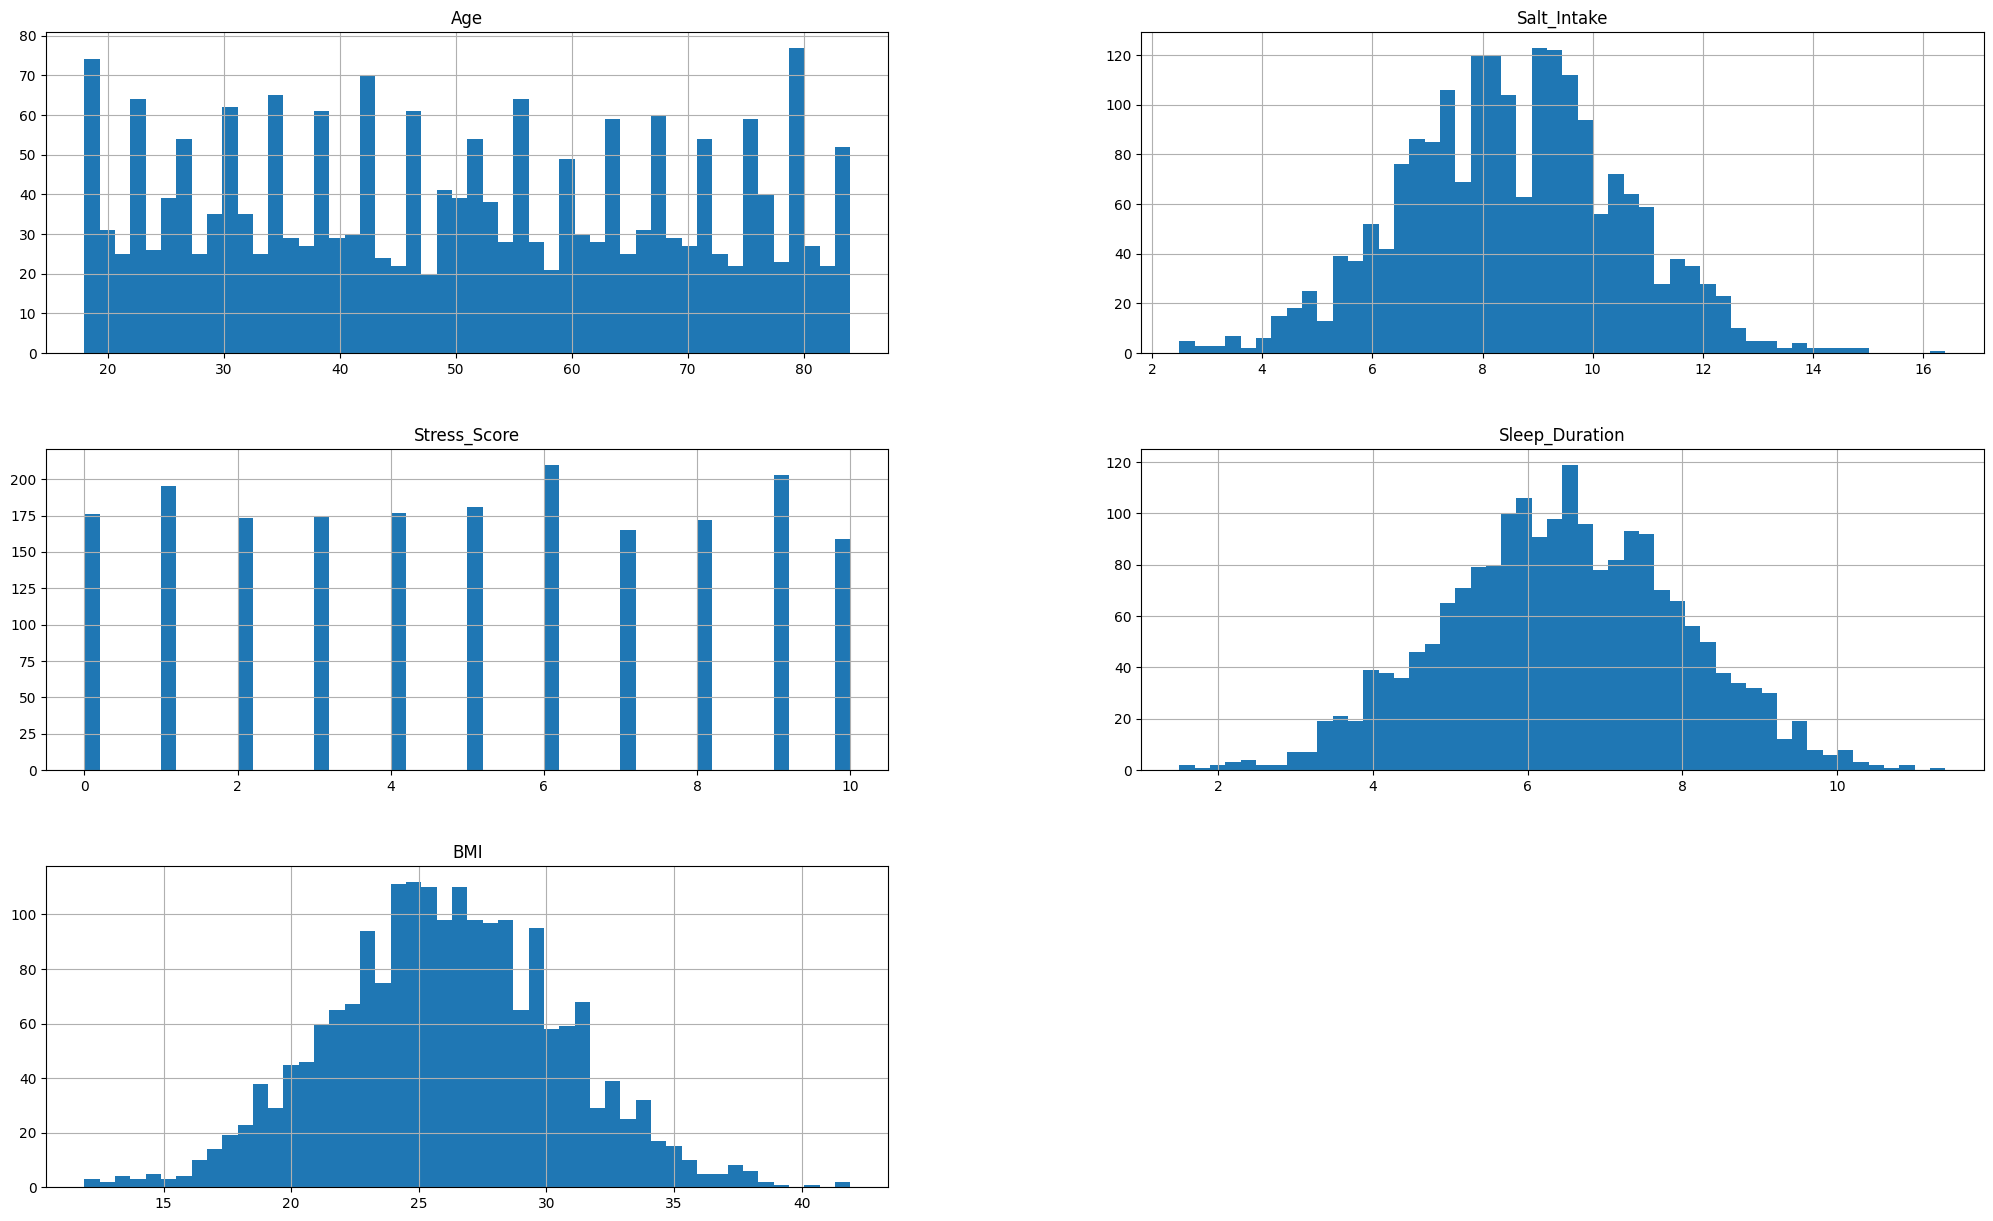

In [252]:
data.hist(bins=50, figsize=(25,15))
plt.show()

Variaveis categóricas:

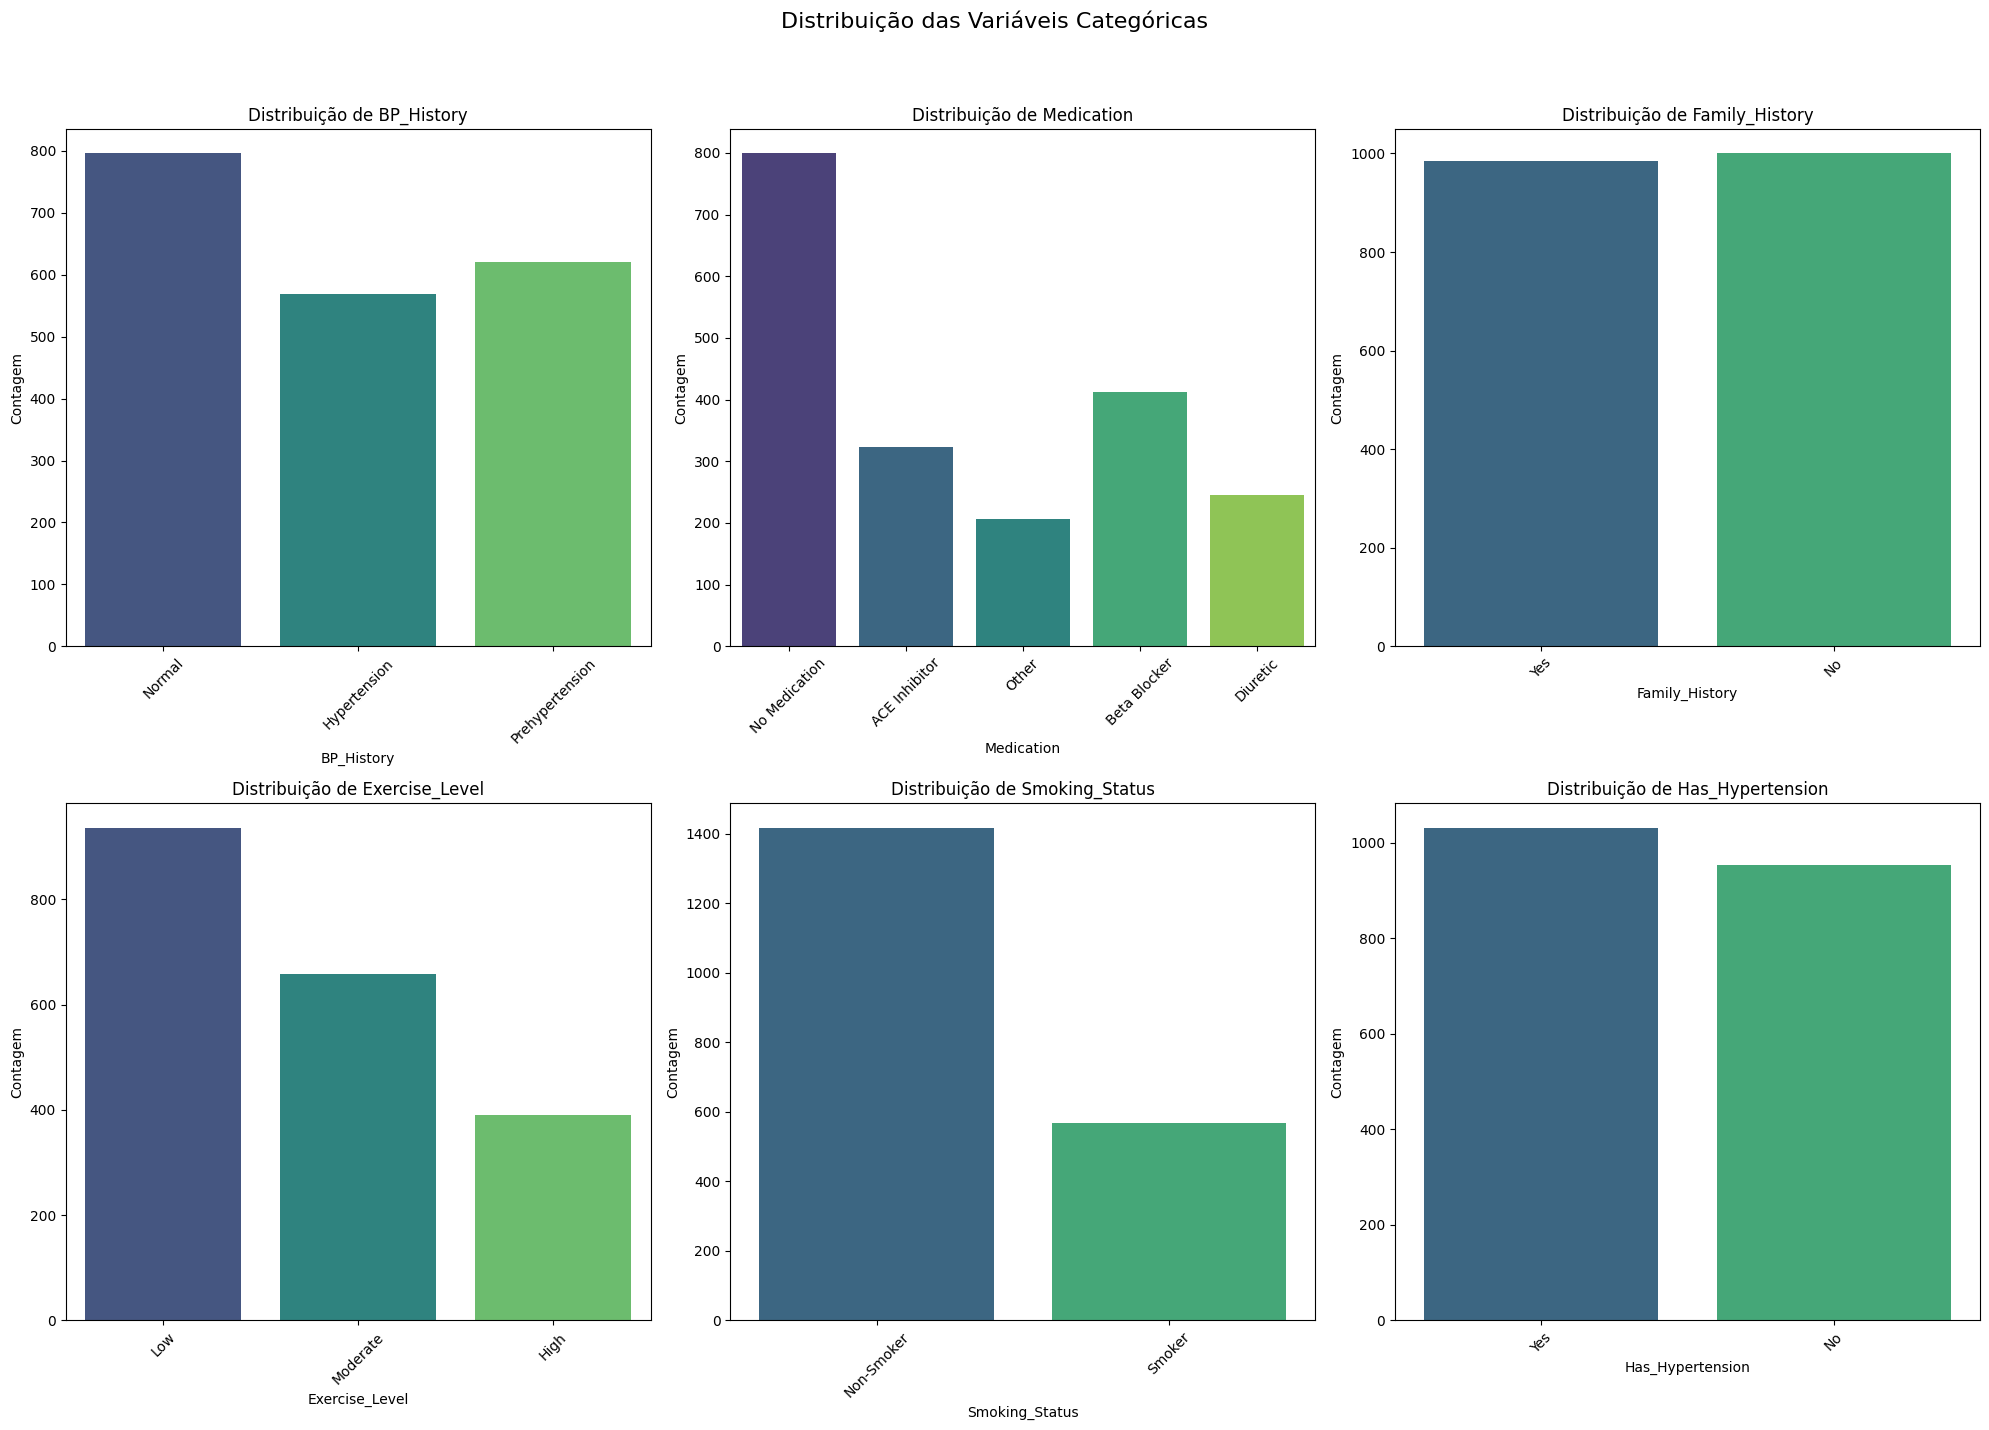

In [253]:

fig, axs = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Distribuição das Variáveis Categóricas', fontsize=16)
categorical_cols = data.select_dtypes(include=['object']).columns
for i, col in enumerate(categorical_cols):
    ax = axs[i // 3, i % 3]
    sns.countplot(data=data, x=col, ax=ax, palette='viridis')
    ax.set_title(f'Distribuição de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Contagem')
    ax.tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])


Analizando variaveis correlacionadas a hipertensão:

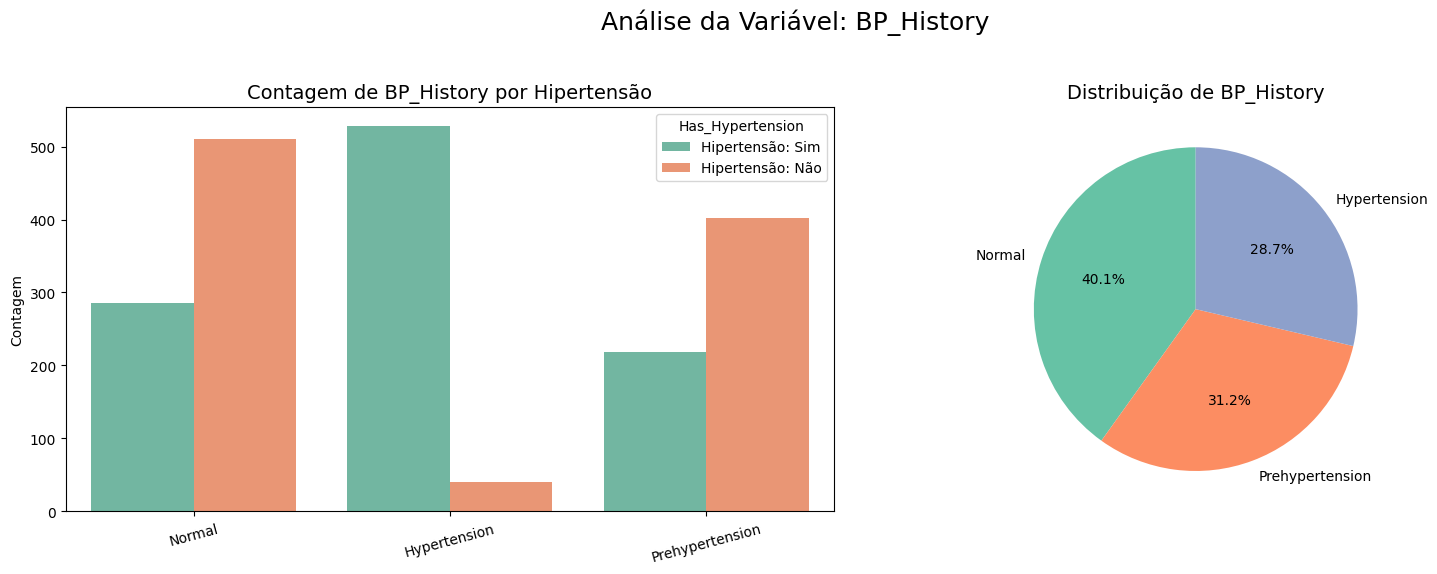

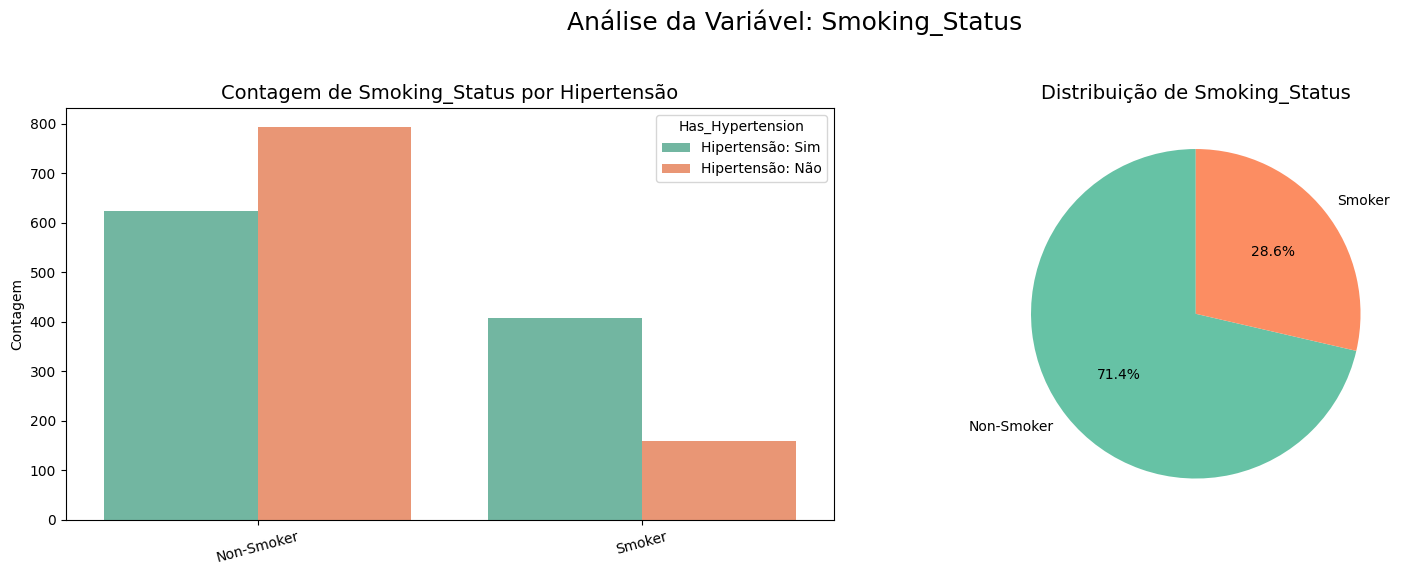

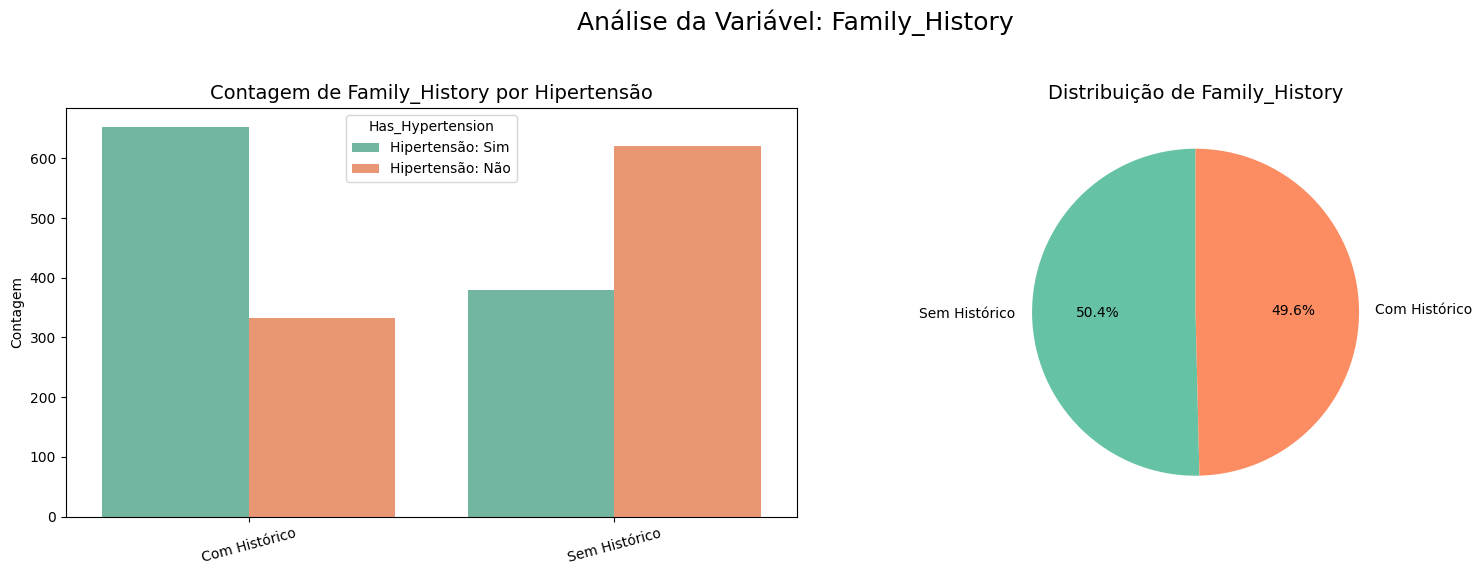

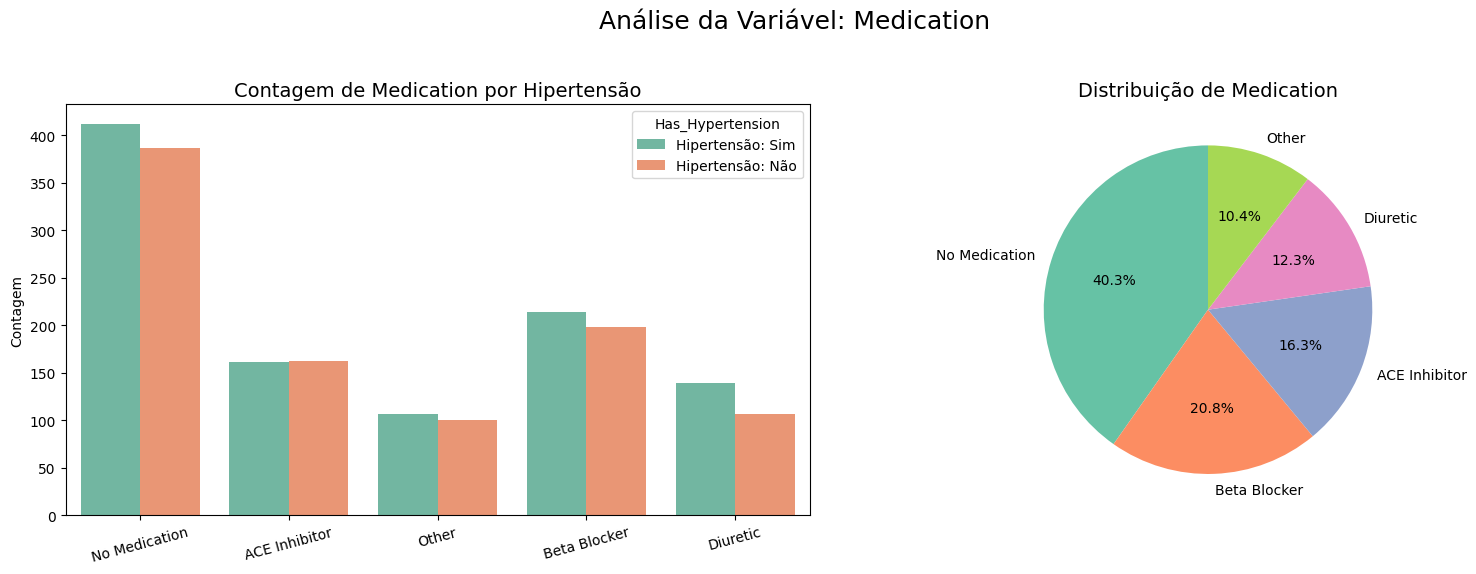

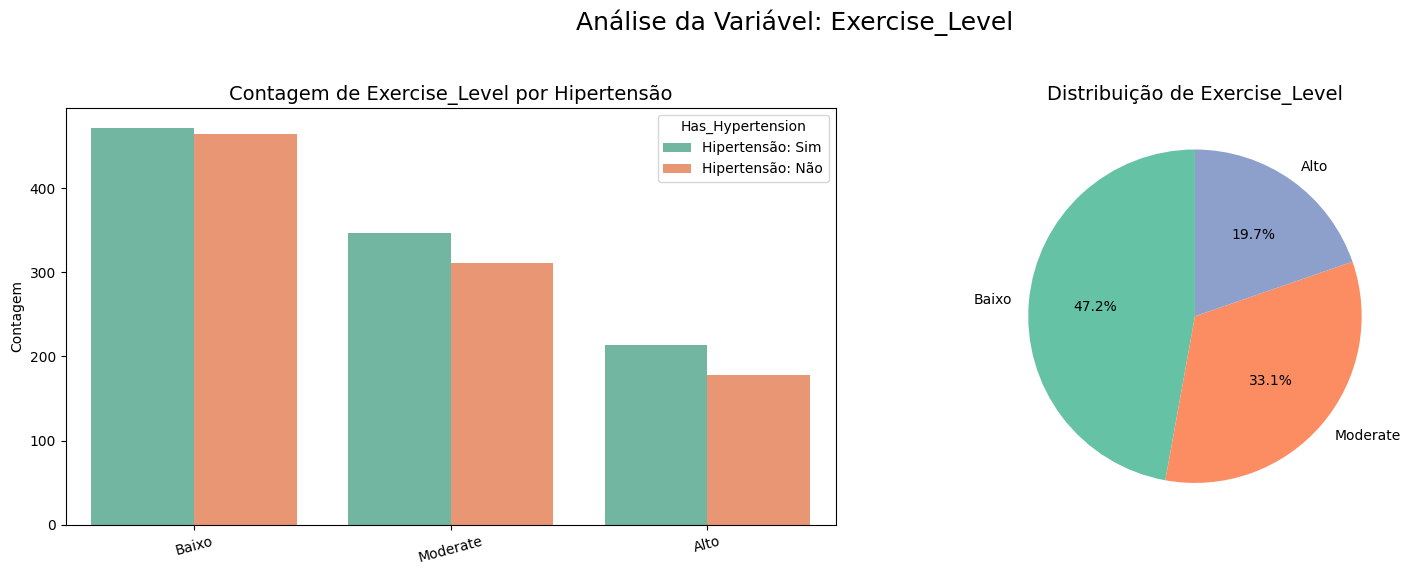

In [ ]:
hue_variable = 'Has_Hypertension'

categorical_features = ['BP_History', 'Smoking_Status',
                        'Family_History', 'Medication', 'Exercise_Level']

data_plot = data.copy()

data_plot[hue_variable] = data_plot[hue_variable].map(
    {'Yes': 'Hipertensão: Sim', 'No': 'Hipertensão: Não'})

mappings = {
    'Family_History': {'Yes': 'Com Histórico', 'No': 'Sem Histórico'},
    'Exercise_Level': {'Low': 'Baixo', 'Medium': 'Médio', 'High': 'Alto'}
}

for feature, mapping in mappings.items():
    if feature in data_plot.columns:
        data_plot[feature] = data_plot[feature].replace(mapping)

for feature in categorical_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Análise da Variável: {feature}', fontsize=18)

    # Gráfico 1: Contagem por hipertensão
    sns.countplot(data=data_plot, x=feature, hue=hue_variable,
                  ax=axes[0], palette='Set2')
    axes[0].set_title(f'Contagem de {feature} por Hipertensão', fontsize=14)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Contagem')
    axes[0].tick_params(axis='x', rotation=15)

    # Gráfico 2: Distribuição geral (Pizza)
    distribution = data_plot[feature].value_counts()
    axes[1].pie(distribution, labels=distribution.index,
                autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    axes[1].set_title(f'Distribuição de {feature}', fontsize=14)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Vamos preparar para o treinamento

In [255]:
np.random.seed(42)

Encoding target antes de dividir em treino e teste

In [256]:
data.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,No Medication,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,No Medication,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,No Medication,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [266]:
hyper_df = data.copy()
hyper_df['Has_Hypertension'] = hyper_df['Has_Hypertension'].map({'Yes': 1, 'No': 0})
hyper_df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,No Medication,Yes,Low,Non-Smoker,1
1,32,11.7,10,Normal,5.4,23.4,No Medication,No,Low,Non-Smoker,0
2,78,9.5,3,Normal,7.1,18.7,No Medication,No,Moderate,Non-Smoker,0
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,1
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,0


Vamos identificar as colunas categóricas e aplicar one-hot encoding nelas e nas colunas numéricas aplicar padronização.

1º Encoding das colunas categóricas

In [258]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
cat_cols = hyper_df.select_dtypes(include=['object']).columns.to_list()

one_hote = OneHotEncoder(sparse_output=False, drop='first')

hypertension_cat_encoded = one_hote.fit_transform(
    hyper_df[cat_cols]) #One-Hot Encoding transforma os dados categoriais em variáveis binárias por meio de uma matriz numpy
hyper_encoded = pd.DataFrame(hypertension_cat_encoded, columns=one_hote.get_feature_names_out(
    cat_cols), index=hyper_df.index) #Transforma a matriz numpy em um DataFrame do pandas novamente



In [269]:
hyper_encoded.head()

,BP_History_Normal,BP_History_Prehypertension,Medication_Beta Blocker,Medication_Diuretic,Medication_No Medication,Medication_Other,Family_History_Yes,Exercise_Level_Low,Exercise_Level_Moderate,Smoking_Status_Smoker
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


2º Separar features (x) e target (y)

In [260]:
x = hyper_df.drop(columns=['Has_Hypertension'] , axis=1)
y = hyper_df['Has_Hypertension']


3º Identificar colunas numéricas e aplicar padronização

In [261]:
num_cols = x.select_dtypes(include= np.number).columns.to_list()

scaler = StandardScaler()
x_num_scaled = scaler.fit_transform(x[num_cols])
x_num_scaled_df = pd.DataFrame(x_num_scaled, columns=num_cols, index=x.index)

4º Combinar colunas numéricas padronizadas com colunas categóricas one-hot encoded

In [262]:
x_processed = pd.concat([x_num_scaled_df, hyper_encoded], axis=1)
display(x_processed.head())
display(y.to_frame().head())

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI,BP_History_Normal,BP_History_Prehypertension,Medication_Beta Blocker,Medication_Diuretic,Medication_No Medication,Medication_Other,Family_History_Yes,Exercise_Level_Low,Exercise_Level_Moderate,Smoking_Status_Smoker
0,0.959963,-0.266590,1.279847,-0.033883,-0.047723,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,-0.943609,1.588600,1.598165,-0.682468,-0.579671,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.422994,0.485514,-0.630061,0.420126,-1.621403,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.634921,0.736216,1.598165,-1.460769,-0.867810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.480578,0.635935,-1.266698,-0.423034,-2.175515,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


,Has_Hypertension
0,1
1,0
2,0
3,1
4,0


Dividir em treino e teste

In [300]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_processed, y, test_size=0.2, random_state=42)
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1588, 15)
Shape of X_test: (397, 15)
Shape of y_train: (1588,)
Shape of y_test: (397,)


Agora vamos selecionar e treinar os modelos

In [312]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Machine": SVR()
}
results = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_class = (y_pred > 0.5).astype(int)  # Convertendo previsões contínuas em classes binárias

    accuracy = accuracy_score(y_test, y_pred_class)
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
   }



Agora vamos avaliar os modelos e comparar os resultados

In [313]:
results_df = pd.DataFrame(results).T
print(results_df)

                        Accuracy  Precision    Recall  F1 Score
Linear Regression       0.876574   0.919355  0.834146  0.874680
Decision Tree           0.934509   0.936585  0.936585  0.936585
Random Forest           0.947103   0.955446  0.941463  0.948403
Support Vector Machine  0.884131   0.903553  0.868293  0.885572


Agora vamos comparar os resultados graficamente

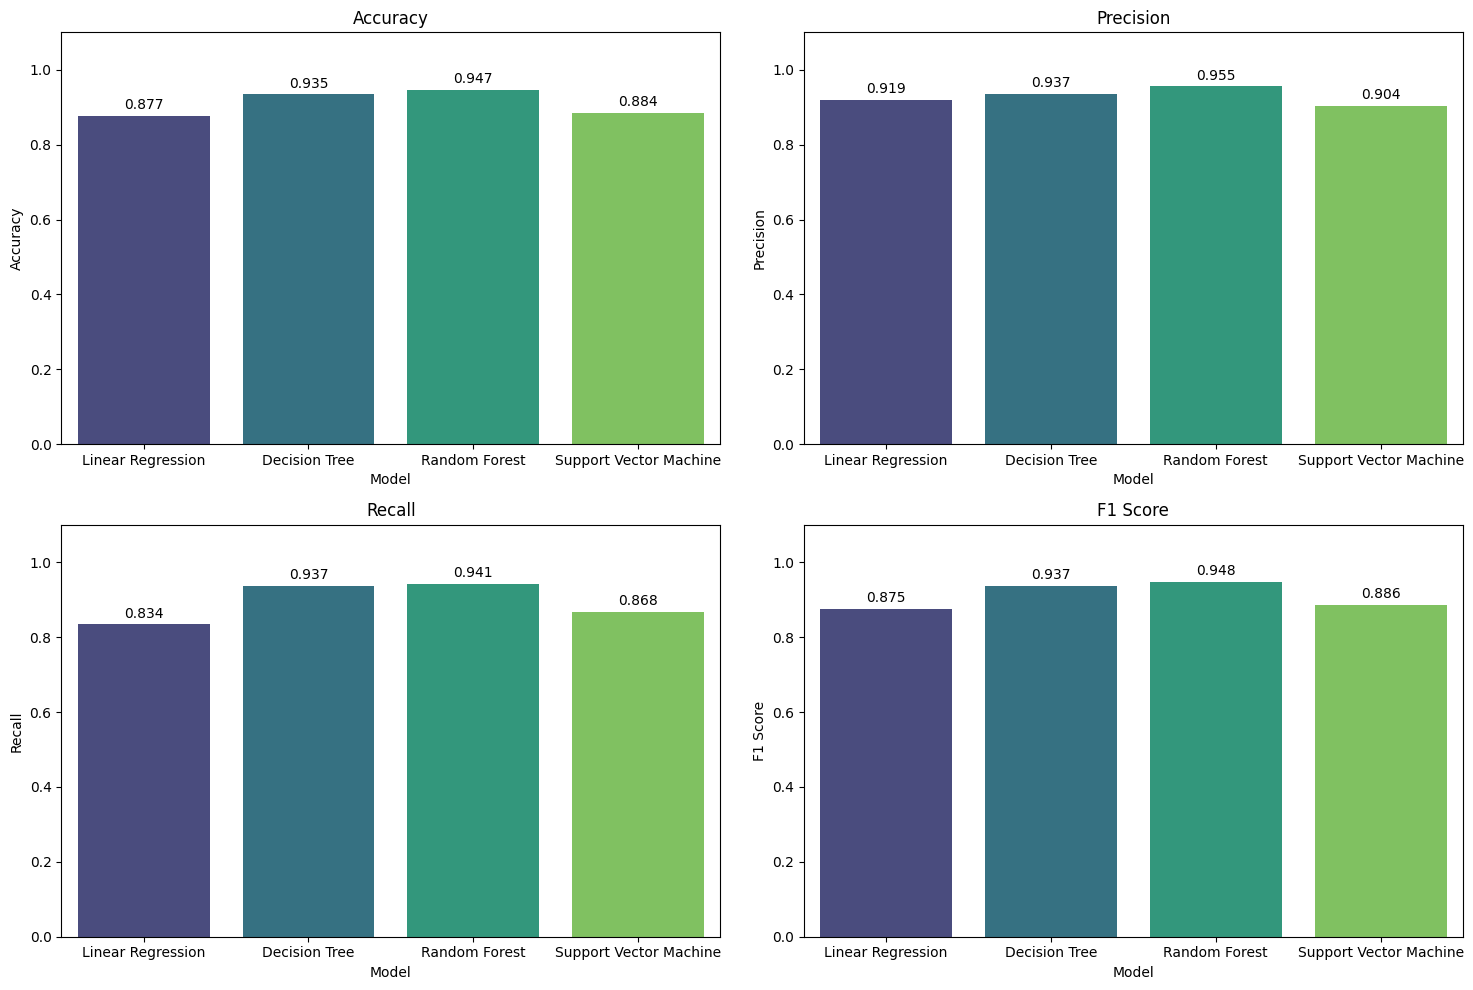

In [314]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
model_names = list(results.keys())
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    values = [results[model][metric] for model in model_names]

    
    sns.barplot(x=model_names, y=values, ax=ax, palette='viridis')

    
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2.,  
            p.get_height() + 0.01,           
            f'{p.get_height():.3f}',         
            ha='center', va='bottom'
        )

    # Estética
    ax.set_title(metric)
    ax.set_ylim(0, 1.1)  
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
   

plt.tight_layout()
plt.show()